## Data Explanation

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

## Import Libraries


Import the libraries we need for the lab

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

Read in the csv file from the URL using the request library

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

## Tasks

### Task 4: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

-   For the "Median value of owner-occupied homes" provide a **boxplot**

-   Provide a **bar plot** for the Charles river variable

-   Provide a **boxplot** for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

-   Provide a **scatter plot** to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

-   Create a **histogram** for the pupil to teacher ratio variable

#### *Code here*

#### Q1

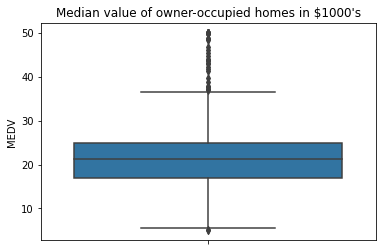

In [3]:
ax1 = sns.boxplot(y='MEDV', data=boston_df).set(title="Median value of owner-occupied homes in $1000\'s")


#### Q2

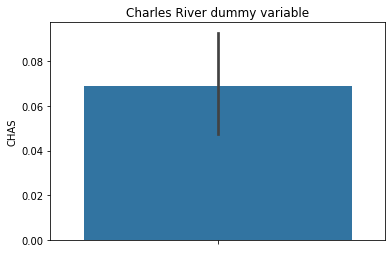

In [4]:
ax2 = sns.barplot(y='CHAS', data=boston_df).set(title="Charles River dummy variable")

#### Q3

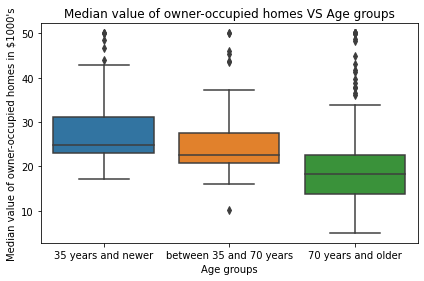

In [5]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and newer'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
ax3 = sns.boxplot(x='age_group', y='MEDV',data=boston_df.sort_values(['AGE']))
ax3.set(title='Median value of owner-occupied homes VS Age groups', xlabel='Age groups', ylabel='Median value of owner-occupied homes in $1000\'s')
plt.tight_layout()

#### Q4
-   Question:  What can you say about the relationship?
-   Answer: I cannot see obvious relationship between these two variables.

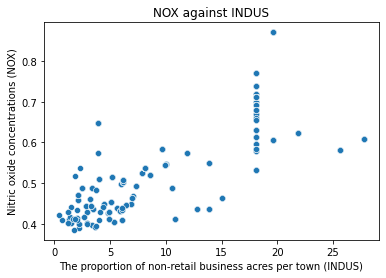

In [6]:
ax4 = sns.scatterplot(x='INDUS', y='NOX', data=boston_df).set(title="NOX against INDUS", xlabel='The proportion of non-retail business acres per town (INDUS)', ylabel='Nitric oxide concentrations (NOX)')

#### Q5

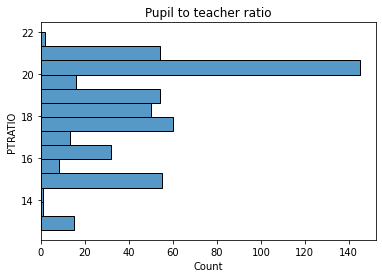

In [7]:
ax5 = sns.histplot(y='PTRATIO', data=boston_df).set(title="Pupil to teacher ratio")

### Task 5: Use the appropriate tests to answer the questions provided.


For each of the following questions;

-   Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

-   Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

-   Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

-   What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

1.  State your hypothesis.

2.  Use α = 0.05

3.  Perform the test Statistics.

4.  State the conclusion from the test.

##### Problem 1
Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
##### Solution
-   Hypothesis:
    *   $H\_0: there is no difference in median value of houses bounded by the Charles river
    *   $H\_1: there is a significant difference in median value of houses bounded by the Charles river
-   Code

In [8]:
scipy.stats.levene(
    boston_df[boston_df['CHAS']==0]['MEDV'], boston_df[boston_df['CHAS']==1]['MEDV'],center='mean'
)

# since the p-value is less than 0.05, the variance are not equal.

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [9]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],
                   boston_df[boston_df['CHAS']==1]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

-   Conclusion
    
Since the p-value of the t-test is smaller than 0.05, we deny the null hypothesis and believe **there is a significant difference in median value of houses bounded by the Charles river**

##### Problem 2
Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
##### Solution
-   Hypothesis:
    *   $H\_0: there is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
    *   $H\_1: there is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
-   Code

In [13]:
# First group the AGE into groups since the one-way ANOVA doesn't work for continuous variables
# This is done in the previous code
g_35_smaller = boston_df[boston_df['age_group'] == '35 years and newer']['MEDV']
g_35_70 = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
g_70_greater = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']
scipy.stats.levene(g_35_smaller,
                   g_35_70,
                   g_70_greater, 
                   center='mean')
# Levene Test showing equal-variance

f_statistic, p_value = scipy.stats.f_oneway(g_35_smaller, g_35_70, g_70_greater)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


-   Conclusion
    
Since the p-value of the ANOVA is smaller than 0.05, we deny the null hypothesis and believe **there is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)**

##### Problem 3 
Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
##### Solution
-   Hypothesis:
    *   $H\_0: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
    *   $H\_1: there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
-   Code

In [14]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.7636514469209157, 7.913361061233745e-98)

-   Conclusion
    
Since the p-value of the pearson test is smaller than 0.05, we deny the null hypothesis and believe **there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town**, which means we **cannot** conclude that is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

##### Problem 4
What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
##### Solution

-   Code

In [15]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           1.21e-08
Time:                        21:33:48   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-   Conclusion

An additional weighted distance to the five Boston employment centres will increase the median value of owner occupied homes by 1.09*$1000.